# Tutorial - Calculation of Vector Mediator Decay quantities

## Import the mediator model file

In [2]:
import src.vecdecays as vd
import src.pars as par
import math

## Generate model files

In order to calculate vector mediator decay quantities, we first have to define a model (see example below). Every model has the general structure

\begin{align}
\mathcal{L} = -\frac{1}{2} m_{Z_Q}^2 Z_{Q\mu}Z_Q^\mu-g_Q J_Q^\mu Z_{Q\mu}+e\varepsilon J_{\rm em}^\mu Z_{Q\mu}    + g_\chi Z^\mu_Q  J_\mu^{\rm DM}+\mathcal{L}_{\rm DM}
\end{align}
with
\begin{align}
    J_Q^\mu &= \sum_f \bar{f}\gamma^\mu q_Q^f f = \sum_{q=d,u,s,c,b,t} \bar q \gamma^\mu q_Q^q q -\sum_{l=e,\mu,\tau,\nu_e,\nu_\mu,\nu_\tau} \bar l \gamma^\mu q_Q^l l\\
    J_{\rm em}^\mu &= \sum_f \bar{f}\gamma^\mu q_{\rm em}^f f = \sum_{q=d,u,s,c,b,t} \bar q \gamma^\mu q_{\rm em}^q q -\sum_{l=e,\mu,\tau} \bar l \gamma^\mu q_{\rm em}^l l
\end{align}
In case of existing gauge couplings $g_Q$, we neglect the kinetic mixing contribution $e\varepsilon \ll g_Q$. The dark sector is given by 
\begin{align}
\mathcal{L}_{\rm DM}&=|\delta_\mu \chi|^2-  m_\chi|\chi|^2  , &\quad J_\mu^{\rm DM}&=i(\partial_\mu \chi^* \chi - \chi^* \partial_\mu \chi) &\quad ({\rm complex~scalar} )\notag\\
\mathcal{L}_{\rm DM}&=\frac{1}{2} \bar{\chi}i\gamma^\mu \delta_\mu \chi-\frac12 m_\chi \bar{\chi}\chi , &\quad J_\mu^{\rm DM}&=\frac12 \bar{\chi}\gamma_\mu\gamma^5\chi &\quad ({\rm Majorana~fermion} )\notag\\
\mathcal{L}_{\rm DM}&=i\bar{\chi}\gamma^\mu\delta_\mu\chi-m_\chi\bar{\chi}\chi , &\quad J_\mu^{\rm DM}&=\bar{\chi}\gamma_\mu\chi &\quad ({\rm Dirac~fermion} )
\end{align}
The DM mass will be defined through the parameter $R_\chi=\frac{m_X}{m_\chi}$. A special case of DM is given by inelastic pseudo-Dirac DM with
\begin{align}
\mathcal{L}_{\rm DM}&=m_D \eta \xi+\frac12 m_M (\eta^2+\xi^2), &\quad J_\mu^{\rm DM}&=i\bar{\chi}_1\gamma^\mu \chi_2 &\quad ({\rm inelastic})\notag
\end{align}
where $\chi_1 \simeq \frac{i}{\sqrt{2}}(\eta-\xi), \chi_2\simeq \frac{1}{\sqrt{2}}(\eta+\xi)$ are the mass eigenstates of the pseudo-Dirac DM.

### Example B-L with Majorana fermion DM

The model is initiated with a model name `Model("modelname")`. The model name will be used to specify the folders to save files, and will be shown in the plots. The model name does not specify anything in the calculations.

#### Initiate Model

In [3]:
model = vd.Model("B")

#### Assign Charges

- $U(1)_Q$ Models

In the case of the generic $U(1)_Q$ models with $Q \neq 0$, the SM particles have charges depending on the choosen symmetry. We can set these $q_Q^f$ charges through `set_couplings([`$q_Q^d,q_Q^u,q_Q^s,q_Q^c,q_Q^b,q_Q^t,q_Q^e,q_Q^\mu,q_Q^\tau,q_Q^{\nu_e},q_Q^{\nu_\mu},q_Q^{\nu_\tau}$ `])`.
The $U(1)_Q$ coupling constant $g_Q$ can be changed via `gQ`. Its default value is `gQ = 1.` in order to make it easy to set constraints on the model later on. 

In [4]:
kin = par.ge**2/(4.*math.pi)**2
model.set_charges([1./3,1./3,1./3,1./3,1./3,1./3,kin,kin,kin,0,0,0.])
model.gQ = 1.

- Dark Photon Model

In the secluded case, the SM particles are not charged under the new $U(1)$ group, such that the portal only proceeds via kinetic mixing. For this case, we will proceed in a similar way and set the couplings via `model.set_charges()`. If in the charge definition we already include the electromagnetic coupling strength $e$, that can be called via `par.ge`, the `gQ` variable will represent the kinetic mixing parmeter $\epsilon$. If we do not include the $e$ factor, remember that $g_Q \equiv \epsilon e$.

In [ ]:
# Dark Photon case 
modelDP = vd.Model("DP")
modelDP.set_charges([-par.ge/3,par.ge/3,-par.ge/3,par.ge/3,-par.ge/3,par.ge/3,-par.ge,-par.ge,-par.ge,0,0,0])
modelDP.gQ = 1. #gQ = epsilon 

The `gQ` variable needs to be different fom $0$, otherwise the new gauge boson will not couple to any particle.

#### Specification of DM type

The DM type is specified with `set_DMtype()`. Possible options are given above in the model description. To call those options, we have to choose between `DM = complex scalar, Majorana, Dirac, inelastic`. If the vector mediator is not coupling to DM, we simply have to set `DM="No"`. If no DM type is specified, the default value is `No`. The DM mass is set in relation to the mediator mass as often done in the literature. The ratio $R_\chi=\frac{m_X}{m_\chi}$ (mediator mass/DM mass) can be changed with `model.R=3`. The mediator coupling to DM $g_\chi$ is given by `gDM` and its default value is `gDM=1.` In case of the inelastic DM model, a mass splitting between the two pseudo-Dirac states is chosen via `model.split=0.1`. To change all parameters and specify the DM type all in one, we can just call `model.DMtype(DM='Majorana,Rchi=3,splitting=0.1)`.

In [5]:
model.set_DMtype(DM="No",Rchi=3,gDM=1.0,splitting=0.1)

#### Set folders

Set folders in order to save results from width, branching ratio, or $R_\mu^{\mathcal{H}}$ calculations. The results will be stored in `models/modelname_DMtype`.

In [6]:
model.set_folders()

new model called  B  with  SM  couplings


## Width Calculation

#### Initiate Model

To initiate the Widths class, we have to insert the above specified model. This sets the model name, DM type, and couplings and masses of the model.

In [7]:
widths = vd.Widths(model)

#### Calculate Widths

The calculation of all decay widths of the vector mediator is done with `calc()`. This includes all hadronic decay modes as listed in Tab. 2 and Tab. 3 of arXiv:2112.XXXXX, all leptonic channels, the decay to DM if specified, as well as the total decay width. The user can choose up to which mediator mass value the decay quantities should be calculated. By default, we have `calc(mmax=2.0)`

In [8]:
widths.calc(mmax=2.0)

processed up to m= 0.1 GeV ( 100 / 2000 mass values) in 0.002 seconds
processed up to m= 0.2 GeV ( 200 / 2000 mass values) in 0.004 seconds
processed up to m= 0.3 GeV ( 300 / 2000 mass values) in 0.006 seconds
processed up to m= 0.4 GeV ( 400 / 2000 mass values) in 0.008 seconds
processed up to m= 0.5 GeV ( 500 / 2000 mass values) in 0.011 seconds
processed up to m= 0.6 GeV ( 600 / 2000 mass values) in 0.015 seconds
processed up to m= 0.7 GeV ( 700 / 2000 mass values) in 0.018 seconds
processed up to m= 0.8 GeV ( 800 / 2000 mass values) in 0.022 seconds
processed up to m= 0.9 GeV ( 900 / 2000 mass values) in 0.026 seconds
processed up to m= 1.0 GeV ( 1000 / 2000 mass values) in 0.048 seconds
processed up to m= 1.1 GeV ( 1100 / 2000 mass values) in 0.418 seconds
processed up to m= 1.2 GeV ( 1200 / 2000 mass values) in 2.083 seconds
processed up to m= 1.3 GeV ( 1300 / 2000 mass values) in 4.992 seconds
processed up to m= 1.4 GeV ( 1400 / 2000 mass values) in 8.665 seconds
processed up to

#### Plot Widths

The calculated widths can be plotted with `plot(xrange=[0.1,2.],yrange=[1.e-2,2.],Wsingle_had=[],Wsingle_lep=[])`. By default only the total decay width is plotted in the specified range. Single partial widths can be added to the plot by adding channels to the lists `Wsingle_had = []` and `Wsingle_lep`.

For the partial widths, one can choose between: 

`Wsingle_had= ["2pi","3pi","PiGamma","EtaGamma","EtaOmega","EtaPhi","PhiPi","OmegaPion",
"EtaPiPi","EtaPrimePiPi","4pi","6pi","KK","KKpi","KKpipi","PhiPiPi","OmPiPi","ppbar","nnbar"]`

`Wsingle_lep=["elec","muon", "tau", "nue","numu","nutau"]`

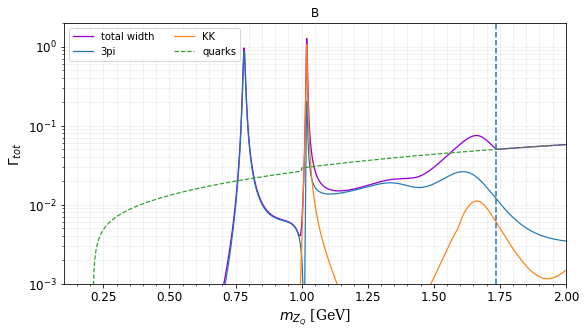

In [9]:
wplot = widths.plot(xrange=[0.1,2.],yrange=[1.e-3,2.],Wsingle_had=["3pi","KK"],Wpert=True)

#### Calculate single hadronic channel

In the case of hadronic channels, some channels like $4\pi$ consists of $2\pi^+ 2\pi^-$ and $2\pi^0\pi^+\pi^-$. With `calc()`, we only calculate the total $4\pi$ width and branching ratio. With the function `calc_single()` one can calculate the branching ratio and width of a single hadronic sub-channel. 

All available channels are:

| | channels| | 
|:-----:|:-----:|:-----:|
|&emsp;"6pi_c" ($3\pi^+3\pi^-$) &emsp;| "6pi_n" $$(2\pi^+2\pi^-2\pi^0)$$ &emsp;  | &emsp;  &emsp; &emsp;   |
|&emsp;"KK_c" ( $K^+K^-$) &emsp;| "KK_n" $$(\bar{K}^0 K^0)$$  &emsp;| &emsp; &emsp;  |
|&emsp;"KKpi_0" $$(K_L K_S \pi^0)$$ &emsp; | "KKpi_1" $$(K^+K^-\pi^0)$$ &emsp;| "KKpi_2" $$(K^\pm \pi^\mp K^0)$$  &emsp;| 
|&emsp;"KKpipi_0" $$(K^+\pi^-K^-\pi^+)$$ | "KKpipi_1" $$(K_S K^\pm \pi^\mp \pi^0)$$| &emsp; &emsp; |
|&emsp;"KKpipi_2" $$(K_S K^\pm \pi^\mp \pi^0)$$ |"KKpipi_3" $$(K_S K^\pm \pi^\mp \pi^0)$$ |&emsp;&emsp;   |
|&emsp;"PhiPiPi_n" $$(\phi \pi^0\pi^0)$$ |"PhiPiPi_c" $$(\phi\pi^+\pi^-)$$ | &emsp;&emsp;| 
|&emsp;"OmPiPi_n" $$(\omega\pi^0\pi^0)$$ | "OmPiPi_c" $$(\omega\pi^+\pi^-)$$| &emsp;&emsp;| 
|&emsp;"ppbar" $$(p\bar{p})$$ | "nnbar" $$(n\bar{n})$$ | &emsp;&emsp;|
|&emsp;"4pi_c" $$(2\pi^+2\pi^-)$$ | "4pi_n" $$(2\pi^0\pi^+\pi^-)$$ | &emsp;&emsp;|

The calculated partial width of a sub-channel will be directly saved in the predefined folder.

In [10]:
widths.calc_single("4pi_n")

#### Save widths in predefined folder

All calculated widths are saved with `save()`.

In [11]:
widths.save()

## Branching Ratio Calculation

To initiate the branching ratio class, you have to insert the widths calculated above. The widths will be used to calculate the branching ratios.

In [12]:
brs = vd.Branching(widths)

#### Calculate branching ratios

In [13]:
brs.calc()

#### Plot the Branching ratios

Plot branching ratios with `plot(xrange=[0.1,2.],yrange=[1.e-3,2.], BRsingle_had=[],BRsingle_lep=[],BRDM=None)` where `xrange`, and `yrange` specify the range of the plot. With `BRsingle_had=[]` and `BRsingle_lep=[]` you can add extra channels to plot in addition to the total hadronic, electron, muon and invisible branching ratios. The vertical dashed line indicates where the transition between perturbative and non-perturbative results is made (see arXiv:2112.XXXXX)

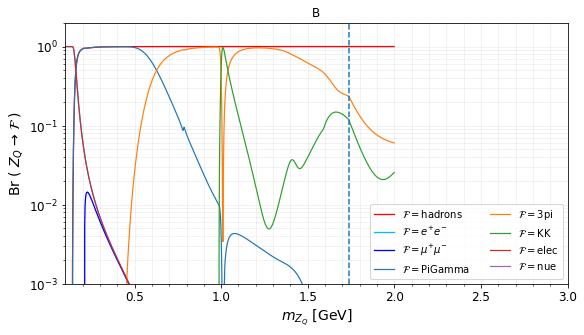

In [14]:
brplot= brs.plot(xrange=[0.1,3.0],BRsingle_had=["PiGamma","3pi","KK"],BRsingle_lep=["elec","nue"])

#### Calculate branching ratio of sub-channel

For the case that we calculated a sub-channel width before, we can calculate its branching ratio here, too. It will directly be saved. Possible sub-channels can be found in the discussion of the widths.

In [15]:
brs.calc_single("4pi_n")

#### Save branching ratio results

The branching ratios are saved to the predefined folders.

In [16]:
brs.save()

## Calculation of the R ratio

The Rvalue class is initiated with `Rvalues(widths)` where `widths` are the calculated widths above. The Rvalue is defined as
\begin{align}
R^{\mathcal{H}}_\mu = \frac{\sigma(e^+e^-\to \mathcal{H})}{\sigma(e^+e^-\to \mu^+\mu^-)}
\end{align}
It is most useful for dark photon models. To calculate the cross-section ratio $R_\mu^{\mathcal{H}}$, we insert the specified model and initiate the class. Since the initial state dependencies should cancel in the ratio, it is equal to the ratio of hadronic decays over muonic decays of the vector mediator. Hence, in the code, we use
\begin{align}
R^{\mathcal{H}}_\mu = \frac{\Gamma_{Z_Q \to \mathcal{H}}}{\Gamma_{Z_Q \to \mu^+\mu^-}}~.
\end{align}

In [17]:
rval = vd.Rvalues(widths)

#### Calculate the R ratio

To calculate $R_\mu^\mathcal{H}$, we just have to call `calc()`.

In [18]:
rval.calc()

#### Plot the R ratio

For the dark photon model, the R ratio should follow the PDG data points in this plot. For other models the ratio is expected to be lower.

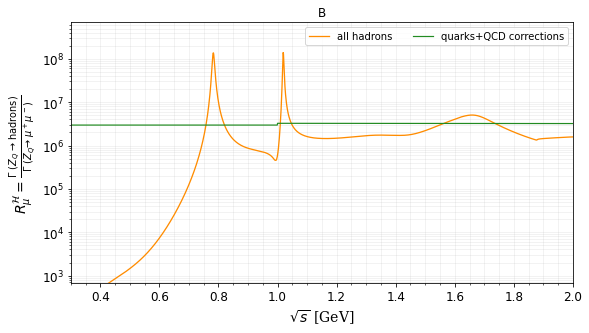

In [19]:
rplot = rval.plot()

#### Save R ratio results

In [20]:
rval.save()